# The MNIST Dataset

In [3]:
import pandas as pd
mnist_df = pd.read_csv('mnist_784_csv.csv')

In [4]:
mnist_df.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9


In [10]:
X = mnist_df.iloc[:,:-1]
y = mnist_df[['class']]

In [6]:
print(X.shape, y.shape)

(70000, 784) (70000,)


In [7]:
X.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### peeking at one of the image

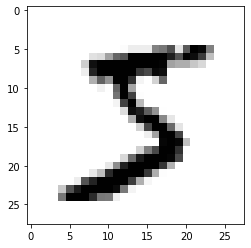

In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

some_digit = X.iloc[0].to_numpy()
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap='binary')


In [22]:
mnist_df.dtypes

pixel1      int64
pixel2      int64
pixel3      int64
pixel4      int64
pixel5      int64
            ...  
pixel781    int64
pixel782    int64
pixel783    int64
pixel784    int64
class       int64
Length: 785, dtype: object

In [39]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(mnist_df, train_size=60000)
X_train = train.iloc[:,:-1]
y_train = train['class']
X_test = test.iloc[:, :-1]
y_test = test['class']

In [40]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [41]:
y_train_5 = (y_train==5)
y_test_5 = (y_test==5)

In [42]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [51]:
sgd_clf.predict(X.iloc[[0]])

array([ True])

In [55]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9626, 0.9623, 0.9674])

In [56]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [58]:
y_train_pred.shape

(60000,)

In [62]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[54137,   462],
       [ 1692,  3709]], dtype=int64)

In [63]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5, y_train_pred), recall_score(y_train_5, y_train_pred)


(0.8892351953967873, 0.6867246806147009)

In [64]:
(3709)/(3709+462), 3709/(3709+1692)

(0.8892351953967873, 0.6867246806147009)

In [65]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7749686585875468

In [68]:
from sklearn.metrics import precision_recall_curve
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')


In [89]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [97]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.legend()
    plt.grid()

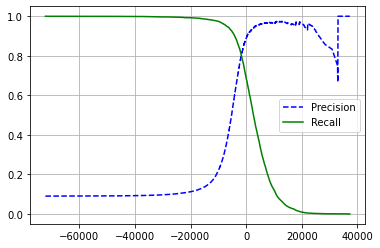

In [98]:
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

In [88]:
np.array(prc[:-1]).T

array([array([0.09027998, 0.09026478, 0.09026629, ..., 1.        , 1.        ,
              1.        ])                                                    ,
       array([1.00000000e+00, 9.99814849e-01, 9.99814849e-01, ...,
              3.70301796e-04, 1.85150898e-04, 0.00000000e+00])    ],
      dtype=object)

In [81]:
prc[-1].shape, prc[:-1].shape

AttributeError: 'tuple' object has no attribute 'shape'

In [72]:
help(precision_recall_curve)

Help on function precision_recall_curve in module sklearn.metrics._ranking:

precision_recall_curve(y_true, probas_pred, *, pos_label=None, sample_weight=None)
    Compute precision-recall pairs for different probability thresholds.
    
    Note: this implementation is restricted to the binary classification task.
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The recall is the ratio ``tp / (tp + fn)`` where ``tp`` is the number of
    true positives and ``fn`` the number of false negatives. The recall is
    intuitively the ability of the classifier to find all the positive samples.
    
    The last precision and recall values are 1. and 0. respectively and do not
    have a corresponding threshold. This ensures that the graph starts on the
    y axis.
    
  